In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
test = pd.read_csv('../datasets/test.csv')

In [4]:
pd.set_option('display.max_columns', None)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Check shape:

In [5]:
train.shape

(2051, 81)

In [6]:
test.shape

(878, 80)

### Check for nulls in Train:

In [7]:
train.isna().sum()[train.isna().sum() == 0]

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch   

In [10]:
train.isna().sum()[train.isna().sum() != 0]

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
dtype: int64

> 'Alley', 'Pool QC', 'Fence', and 'Misc Feature' columns all have greater than 50% of the values missing. These columns will not provide much value to a model so they should be dropped/not considered in our prediction. 
>
> 'Fireplace QC' is on the cusp of having 50% of values missing, but I will keep this column in for now.

In [9]:
train = train.drop(columns = ['Alley', 'Pool QC', 'Fence', 'Misc Feature'])

### Check data types:

In [12]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 77, dtype: object

In [13]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Pool Area         int64
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 76, dtype: object

### Heatmap:

''

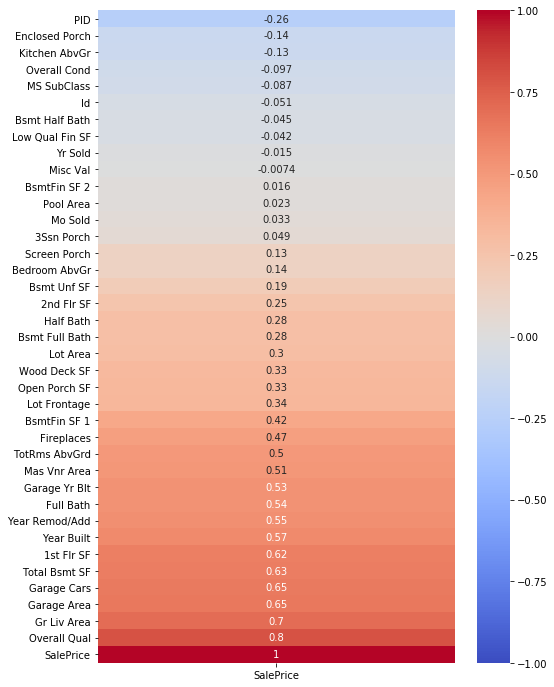

In [14]:
plt.figure(figsize = (8, 12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
;

''

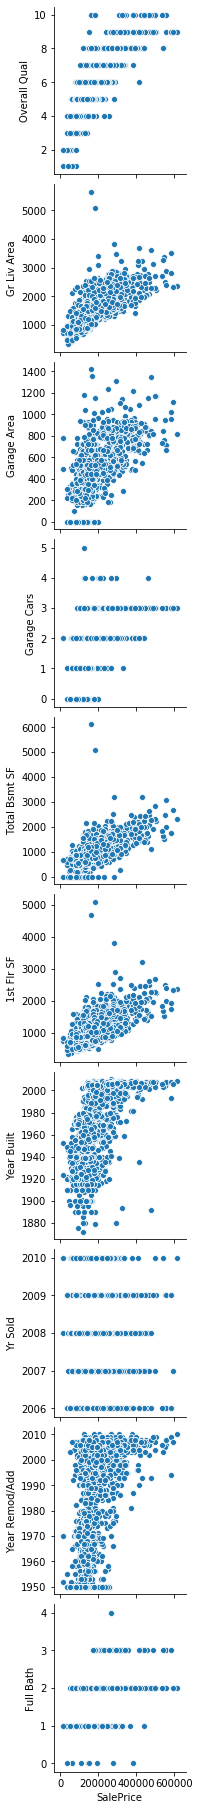

In [15]:
sns.pairplot(train,
             x_vars = ['SalePrice'],
             y_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area',
                      'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 
                      'Year Built', 'Yr Sold', 'Year Remod/Add', 
                      'Full Bath'])
;

''

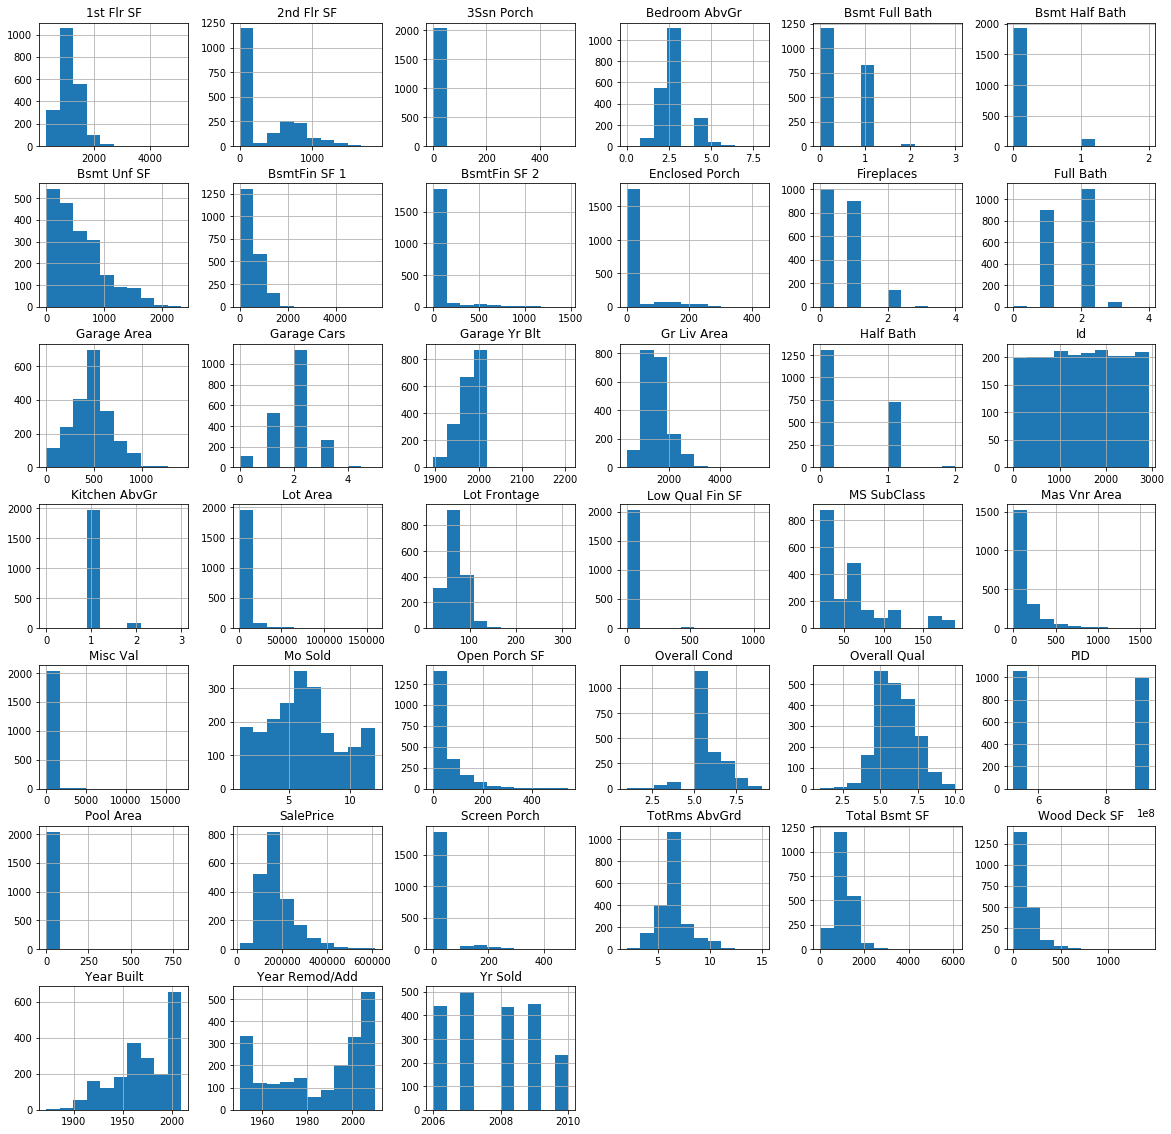

In [16]:
train.hist(figsize = (20,20))
;

''

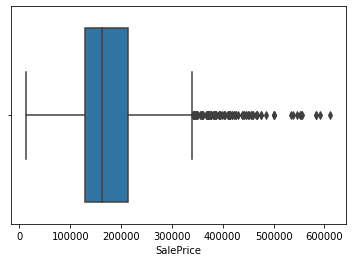

In [17]:
sns.boxplot(train['SalePrice'])
;

''

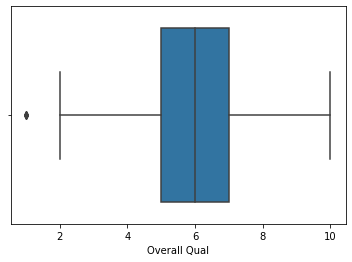

In [18]:
sns.boxplot(train['Overall Qual'])
;

# Testing below here

## 7.4.2

In [15]:
train = train[train['Garage Cars'].notna()]

In [16]:
train = train[train['Garage Area'].notna()]

In [17]:
train = train[train['Total Bsmt SF'].notna()]

In [18]:
train = train[train['Mas Vnr Area'].notna()]

In [19]:
test = test.fillna(0)

In [20]:
X = train[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area']]
y = train['SalePrice']

X.shape, y.shape

((2027, 11), (2027,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1520, 11), (1520,), (507, 11), (507,))

In [22]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [24]:
evaluate_model(ols, X_train, y_train)

R^2: 0.7812959140861664
MSE: 1357102547.0616446
RMSE: 36838.872771321934


In [25]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8410413163131881
MSE: 1019420052.8140231
RMSE: 31928.358129005366


In [26]:
X_kaggle = test[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [27]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_14_1_preds.csv', index = False)

## 7.4.3

In [15]:
train = train[train['Garage Cars'].notna()]

In [16]:
train = train[train['Garage Area'].notna()]

In [17]:
train = train[train['Total Bsmt SF'].notna()]

In [18]:
train = train[train['Mas Vnr Area'].notna()]

In [19]:
test = test.fillna(0)

In [20]:
X = train[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    


In [21]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7874587238906953
MSE: 1318861080.9827816
RMSE: 36316.127009674114


In [22]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8426826581480338
MSE: 1008893941.6186074
RMSE: 31763.090870042975


In [23]:
X_kaggle = test[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces']]
test['SalePrice'] = ols.predict(X_kaggle)

In [24]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_4_3_preds.csv', index = False)

## 7.4.4

In [15]:
train = train[train['Garage Cars'].notna()]

In [16]:
train = train[train['Garage Area'].notna()]

In [17]:
train = train[train['Total Bsmt SF'].notna()]

In [18]:
train = train[train['Mas Vnr Area'].notna()]

In [19]:
train = train[train['BsmtFin SF 1'].notna()]

In [20]:
test = test.fillna(0)

In [21]:
X = train[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [22]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7920755145391329
MSE: 1290212972.6401072
RMSE: 35919.53469409239


In [23]:
evaluate_model(ols, X_test, y_test)

R^2: 0.852322610238937
MSE: 947071836.3915975
RMSE: 30774.53226925793


In [24]:
X_kaggle = test[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1']]
test['SalePrice'] = ols.predict(X_kaggle)

In [25]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_4_4_preds.csv', index = False)

## 7.4.5

In [17]:
train = train[train['Garage Area'].notna()]

In [18]:
train = train[train['Total Bsmt SF'].notna()]

In [19]:
train = train[train['Mas Vnr Area'].notna()]

In [20]:
train = train[train['BsmtFin SF 1'].notna()]

In [20]:
test = test.fillna(0)

In [21]:
X = train[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [22]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7959686355215205
MSE: 1266055379.1541815
RMSE: 35581.67195557541


In [23]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8548881082050712
MSE: 930619007.1942713
RMSE: 30506.0486984839


In [24]:
X_kaggle = test[['1st Flr SF', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [25]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_4_5_preds.csv', index = False)

## 7.5.1

Begin feature engineering with numeric variables

In [15]:
train = train[train['Garage Area'].notna()]

In [16]:
train = train[train['Total Bsmt SF'].notna()]

In [17]:
train = train[train['Mas Vnr Area'].notna()]

In [18]:
train = train[train['BsmtFin SF 1'].notna()]

In [19]:
test = test.fillna(0)

In [20]:
train['1st Flr SF 2']= train['1st Flr SF'] ** 2

In [21]:
X = train[['1st Flr SF 2', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [22]:
evaluate_model(ols, X_train, y_train)


R^2: 0.805331502228952
MSE: 1207956920.666945
RMSE: 34755.67465417619


In [23]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8322054518643378
MSE: 1076085452.8676083
RMSE: 32803.74144617666


In [25]:
test['1st Flr SF 2']= test['1st Flr SF'] ** 2

In [26]:
X_kaggle = test[['1st Flr SF 2', 'Year Built', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [27]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_5_1_preds.csv', index = False)

## 7.5.2

Include 'age when sold'

In [15]:
train = train[train['Garage Area'].notna()]

In [16]:
train = train[train['Total Bsmt SF'].notna()]

In [17]:
train = train[train['Mas Vnr Area'].notna()]

In [18]:
train = train[train['BsmtFin SF 1'].notna()]

In [19]:
test = test.fillna(0)

In [20]:
train['age at sale'] = train['Yr Sold'] - train['Year Built']

In [21]:
X = train[['1st Flr SF', 'age at sale', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [22]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7959996818419389
MSE: 1265862730.5333722
RMSE: 35578.96471980842


In [23]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8549689217638232
MSE: 930100740.6836267
RMSE: 30497.55302780252


In [24]:
test['age at sale'] = test['Yr Sold'] - test['Year Built']

In [25]:
X_kaggle = test[['1st Flr SF', 'age at sale', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [26]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_5_2_preds.csv', index = False)

## 7.5.3

Start to add qualitative vars

Binarize street

In [19]:
train['Street'] = train['Street'].map({'Pave' : 1, 'Grvl' : 0})

In [20]:
train = train[train['Garage Area'].notna()]

In [21]:
train = train[train['Total Bsmt SF'].notna()]

In [22]:
train = train[train['Mas Vnr Area'].notna()]

In [23]:
train = train[train['BsmtFin SF 1'].notna()]

In [24]:
test = test.fillna(0)

In [25]:
train['age at sale'] = train['Yr Sold'] - train['Year Built']

In [38]:
X = train[['1st Flr SF', 'age at sale', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area',
          'Street']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [39]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7959999396695336
MSE: 1265861130.661636
RMSE: 35578.9422364077


In [40]:
evaluate_model(ols, X_test, y_test)

R^2: 0.8549748913756683
MSE: 930062456.8863451
RMSE: 30496.9253677538


In [24]:
test['age at sale'] = test['Yr Sold'] - test['Year Built']

In [25]:
X_kaggle = test[['1st Flr SF', 'age at sale', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [26]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_5_2_preds.csv', index = False)

## 7.5.4

Start to add qualitative vars

Dummy LotShpar, LandContour, Utilities, LotConfig

In [19]:
train = pd.get_dummies(train, columns = ['Utilities'], drop_first = True)

In [20]:
train['Street'] = train['Street'].map({'Pave' : 1, 'Grvl' : 0})

In [21]:
train = train[train['Garage Area'].notna()]

In [22]:
train = train[train['Total Bsmt SF'].notna()]

In [23]:
train = train[train['Mas Vnr Area'].notna()]

In [24]:
train = train[train['BsmtFin SF 1'].notna()]

In [25]:
test = test.fillna(0)

In [26]:
train['age at sale'] = train['Yr Sold'] - train['Year Built']

In [28]:
list(train.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Ga

In [29]:
X = train[['1st Flr SF', 'age at sale', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces', 
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area',
          'Street']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)

def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [30]:
evaluate_model(ols, X_train, y_train)


R^2: 0.7581276338745875
MSE: 1500866354.4674163
RMSE: 38741.01643565146


In [31]:
evaluate_model(ols, X_test, y_test)

R^2: 0.799687147234414
MSE: 1284629025.665259
RMSE: 35841.72185687037


In [24]:
test['age at sale'] = test['Yr Sold'] - test['Year Built']

In [25]:
X_kaggle = test[['1st Flr SF', 'age at sale', 'Overall Qual', 'Gr Liv Area', 
          'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
          'Garage Area', 'Total Bsmt SF', 'Mas Vnr Area', 'Fireplaces',
          'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
test['SalePrice'] = ols.predict(X_kaggle)

In [26]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_5_2_preds.csv', index = False)